#Cloning the pyRDDLGym repository to obtain the pyRDDLGym infrstructure

In [ ]:
!apt-get install python3.10


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.10 is already the newest version (3.10.11-1+focal1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!git clone https://github.com/ataitler/pyRDDLGym.git

fatal: destination path 'pyRDDLGym' already exists and is not an empty directory.


#Initializing environment in pyRDDLGym

In [ ]:
#Changing the working directory to the "pyRDDLGym" directory
%cd /content/pyRDDLGym

/content/pyRDDLGym


In [ ]:
#Installing requirements_jax.txt
!pip install -r requirements_jax.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


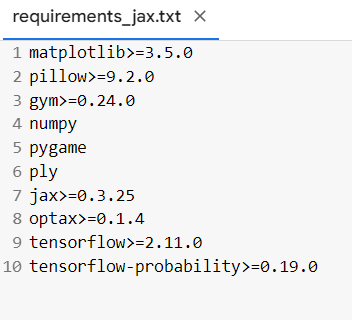

In [ ]:
#Importing the required packages
import jax
import optax
from pyRDDLGym import ExampleManager
from pyRDDLGym import RDDLEnv
from pyRDDLGym.Core.Jax.JaxRDDLBackpropPlanner import JaxRDDLBackpropPlanner, JaxStraightLinePlan



In [ ]:
# specify the model
EnvInfo = ExampleManager.GetEnvInfo('RaceCar')
myEnv = RDDLEnv.RDDLEnv(domain=EnvInfo.get_domain(), instance=EnvInfo.get_instance(0))
model = myEnv.model

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Note:**


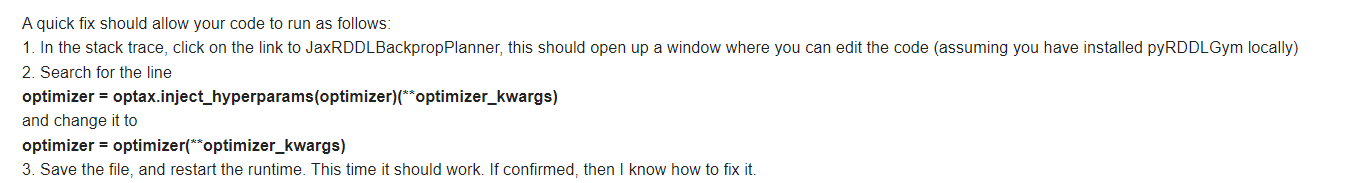


**Credit: Michael Gimelfarb**

In [ ]:
# initialize the planner
# note that actions should be constrained to [-1, 1] for Racecar
planner = JaxRDDLBackpropPlanner(
    model,
    plan=JaxStraightLinePlan(),
    batch_size_train=32,
    rollout_horizon=5,
    optimizer=optax.rmsprop,
    optimizer_kwargs={'learning_rate': 0.01})

/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:835: UserWarning: Initial values of pvariables will be cast to real.
  self.compiled = JaxRDDLCompilerWithGrad(
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:55: UserWarning: Using the replacement rule: a >= b --> sigmoid(a - b)
  '>=': logic.greaterEqual(),
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLLogic.py:200: UserWarning: Using the replacement rule: a >= b --> sigmoid(a - b)
  jax_geq, jax_param = self.greaterEqual()
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLLogic.py:208: UserWarning: Using the replacement rule: a > b --> sigmoid(a - b)
  jax_gre, jax_param = self.greater()
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:58: UserWarning: Using the replacement rule: a > b --> sigmoid(a - b)
  '>': logic.greater(),
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:59: UserWarning: Using the replacement rule: a == b --> sech^2(b - a)
  '==': logic.equal(),
/content/pyR

In [ ]:
# train for 1000 epochs using gradient ascent 
for callback in planner.optimize(jax.random.PRNGKey(42), epochs=1000, step=10):
    print('epoch={} train_return={:.6f} test_return={:.6f}'.format(
          str(callback['iteration']).rjust(4),
          callback['train_return'],
          callback['test_return']))

epoch=   0 train_return=-0.001835 test_return=-0.001842
epoch=  10 train_return=-0.000694 test_return=-0.000701
epoch=  20 train_return=-0.000637 test_return=-0.000644
epoch=  30 train_return=-0.000636 test_return=-0.000643
epoch=  40 train_return=-0.000623 test_return=-0.000630
epoch=  50 train_return=-0.000626 test_return=-0.000633
epoch=  60 train_return=-0.000632 test_return=-0.000639
epoch=  70 train_return=-0.000622 test_return=-0.000629
epoch=  80 train_return=-0.000625 test_return=-0.000632
epoch=  90 train_return=-0.000630 test_return=-0.000636
epoch= 100 train_return=-0.000633 test_return=-0.000640
epoch= 110 train_return=-0.000639 test_return=-0.000646
epoch= 120 train_return=-0.000635 test_return=-0.000642
epoch= 130 train_return=-0.000625 test_return=-0.000632
epoch= 140 train_return=-0.000630 test_return=-0.000637
epoch= 150 train_return=-0.000622 test_return=-0.000629
epoch= 160 train_return=-0.000627 test_return=-0.000634
epoch= 170 train_return=-0.000615 test_return=-0

In [ ]:
!pip install cloudpickle

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cloudpickle as pickle

# Serialize the planner
with open('trained_planner.pkl', 'wb') as f:
    pickle.dump(planner, f)

# Deserialize the planner
with open('trained_planner.pkl', 'rb') as f:
    planner = pickle.load(f)


In [ ]:
# Get the final action sequence
final_params = callback['params']
final_plan = planner.get_action(jax.random.PRNGKey(42), final_params, 0, None)
print("Final Plan:", final_plan)

Final Plan: {'fx': -0.0012986381, 'fy': -0.0012989824}


In [ ]:
# Get the final action sequence
final_params = callback['params']
final_plan = planner.get_action(jax.random.PRNGKey(42), final_params, 0, None)
print("Final Plan:", final_plan)

Final Plan: {'fx': -0.0012986381, 'fy': -0.0012989824}
